<a href="https://colab.research.google.com/github/sharop/TallerGrafos/blob/main/Clase_1_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

# Grafo dirigido

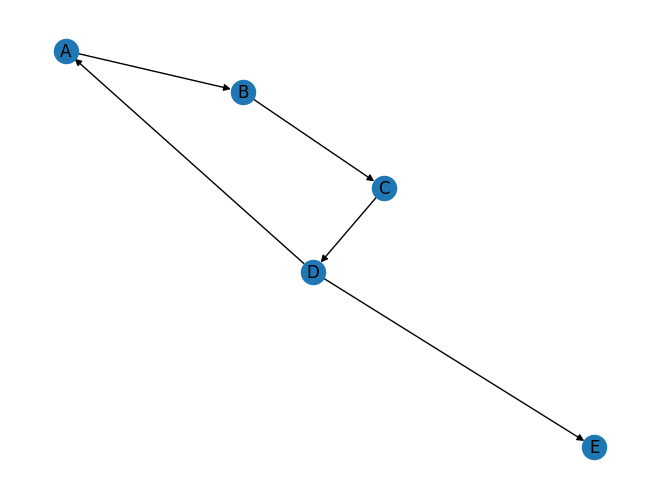

In [16]:
# Crear un grafo dirigido
Gd = nx.DiGraph()

# Agregar aristas al grafo (también agrega los nodos)
Gd.add_edge('A', 'B')
Gd.add_edge('B', 'C')
Gd.add_edge('C', 'D')
Gd.add_edge('D', 'E')
Gd.add_edge('D', 'A')

# Dibujamos el grafo
nx.draw(Gd, with_labels=True)
plt.show()

In [17]:
print("N=",len(Gd.nodes), "L=",len(Gd.edges))

N= 5 L= 5


# Grafo no dirigido

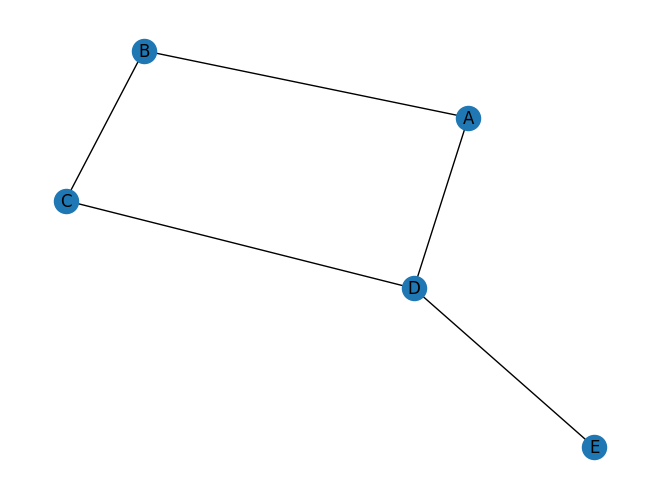

In [18]:
# Crear un grafo dirigido
G = nx.Graph()

# Agregar aristas al grafo (también agrega los nodos)
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'D')
G.add_edge('D', 'E')
G.add_edge('D', 'A')

# Dibujamos el grafo
nx.draw(G, with_labels=True)
plt.show()

In [19]:
print("N=",len(Gd.nodes), "L=",len(Gd.edges))

N= 5 L= 5


# Grados de un grafo

In [20]:
# Grados
in_degrees = G.degree()  # Devuelve un objeto DegreeView con los grados de entrada
print("Grados: ", dict(in_degrees))  # Convertir a un diccionario para una mejor visualización


Grados:  {'A': 2, 'B': 2, 'C': 2, 'D': 3, 'E': 1}


## Grados de entrada y salida

In [21]:
# Grados de entrada
in_degrees = Gd.in_degree()  # Devuelve un objeto DegreeView con los grados de entrada
print("Grados de entrada: ", dict(in_degrees))  # Convertir a un diccionario para una mejor visualización

# Grados de salida
out_degrees = Gd.out_degree()  # Devuelve un objeto DegreeView con los grados de salida
print("Grados de salida: ", dict(out_degrees))  # Convertir a un diccionario para una mejor visualización

Grados de entrada:  {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1}
Grados de salida:  {'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 0}


## $L_{max}$

In [22]:
# Calcular el número máximo de enlaces red no dirigida
n = G.number_of_nodes()
max_edges = n * (n - 1) / 2

print("El número máximo de enlaces es:", max_edges)

El número máximo de enlaces es: 10.0


In [23]:
# Calcular el número máximo de enlaces red dirigida
n = Gd.number_of_nodes()
max_edges = n * (n - 1)

print("El número máximo de enlaces es:", max_edges)

El número máximo de enlaces es: 20


# Distribución de grados

## Grafo no dirigido

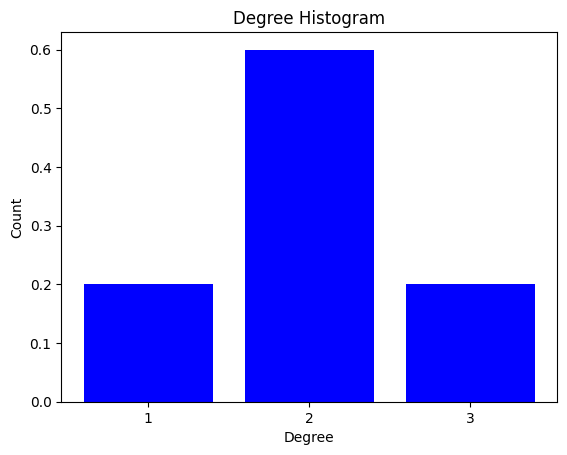

In [24]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # Degree sequence

# Calcular la distribución de grados
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

# Crear el histograma
fig, ax = plt.subplots()
plt.bar(deg, [c/5 for c in cnt], width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

# Grafos ponderados

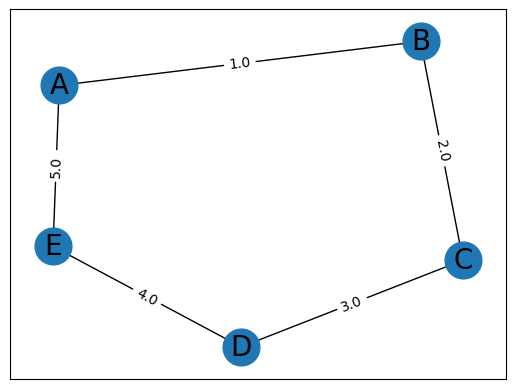

In [25]:
Gp = nx.Graph()

# Agregar aristas con pesos
Gp.add_edge('A', 'B', weight=1.0)
Gp.add_edge('B', 'C', weight=2.0)
Gp.add_edge('C', 'D', weight=3.0)
Gp.add_edge('D', 'E', weight=4.0)
Gp.add_edge('E', 'A', weight=5.0)

pos = nx.spring_layout(Gp) 
nx.draw_networkx_nodes(Gp, pos, node_size=700)
nx.draw_networkx_edges(Gp, pos)

nx.draw_networkx_labels(Gp, pos, font_size=20, font_family='sans-serif')
labels = nx.get_edge_attributes(Gp, 'weight')
nx.draw_networkx_edge_labels(Gp, pos, edge_labels=labels)

plt.show()

In [26]:
# Calcular el grado ponderado de cada nodo
for node in Gp.nodes():
    degree_ponderado = sum(weight for _, _, weight in Gp.edges(node, data='weight'))
    print(f'El grado ponderado del nodo {node} es {degree_ponderado}')

El grado ponderado del nodo A es 6.0
El grado ponderado del nodo B es 3.0
El grado ponderado del nodo C es 5.0
El grado ponderado del nodo D es 7.0
El grado ponderado del nodo E es 9.0


In [27]:
degrees = Gp.degree()  # Devuelve un objeto DegreeView con los grados de entrada
print("Grados: ", dict(degrees))  # Convertir a un diccionario para una mejor visualización

Grados:  {'A': 2, 'B': 2, 'C': 2, 'D': 2, 'E': 2}


# Grafos bipartitas

In [28]:
from networkx.algorithms import bipartite

# Creamos un grafo bipartito
B = nx.Graph()
B.add_nodes_from(['U1', 'U2', 'U3', 'U4'], bipartite=0) # Agregamos los nodos del conjunto U
B.add_nodes_from(['V1', 'V2', 'V3'], bipartite=1) # Agregamos los nodos del conjunto V
B.add_edges_from([('U1', 'V1'), ('U1', 'V2'), ('U2', 'V2'), ('U3', 'V3'), ('U4', 'V2'), ('U4', 'V3')])

# Verificamos que el grafo es bipartito
assert bipartite.is_bipartite(B)

# Obtenemos los conjuntos de nodos U y V
U = set(n for n, d in B.nodes(data=True) if d['bipartite']==0)
V = set(B) - U

# Creamos las proyecciones U-V
U_projection = bipartite.projected_graph(B, U)
V_projection = bipartite.projected_graph(B, V)

print("Proyección U:")
print(U_projection.edges())

print("Proyección V:")
print(V_projection.edges())


Proyección U:
[('U3', 'U4'), ('U2', 'U1'), ('U2', 'U4'), ('U1', 'U4')]
Proyección V:
[('V2', 'V1'), ('V2', 'V3')]


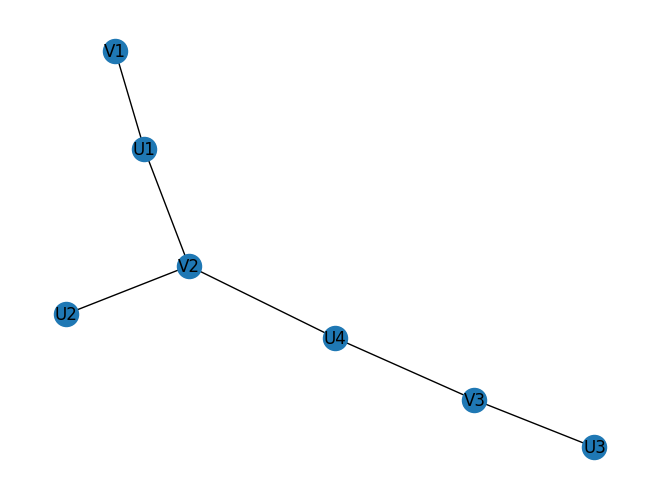

In [31]:
# Dibujamos el grafo
nx.draw(B, with_labels=True)
plt.show()


##Grafo multipartita

In [32]:
# Crear un grafo multipartito (tripartito en este caso)
M = nx.Graph()
M.add_nodes_from(['U1', 'U2', 'U3'], bipartite=0) # Usuarios
M.add_nodes_from(['M1', 'M2', 'M3'], bipartite=1) # Películas
M.add_nodes_from(['G1', 'G2'], bipartite=2) # Géneros
# Agregar aristas entre usuarios y películas
M.add_edges_from([('U1', 'M1'), ('U2', 'M1'), ('U3', 'M2'), ('U1', 'M3'), ('U2', 'M3')])
# Agregar aristas entre películas y géneros
M.add_edges_from([('M1', 'G1'), ('M2', 'G1'), ('M3', 'G2')])

# Verificar si el grafo es bipartite (todos los grafos tripartitos son bipartitos)
assert bipartite.is_bipartite(M)

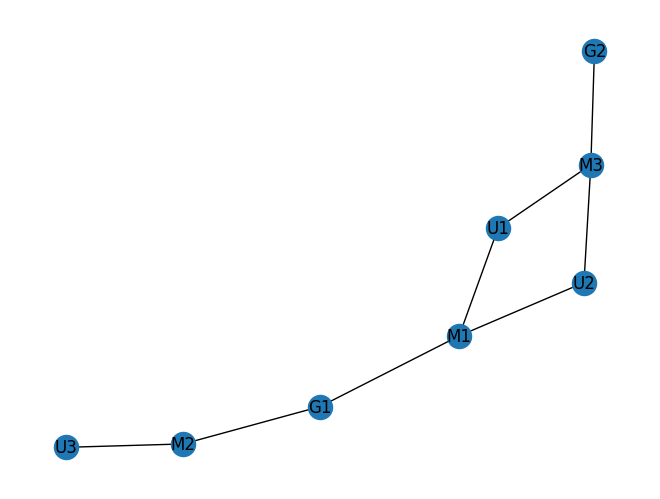

In [33]:
# Dibujamos el grafo
nx.draw(M, with_labels=True)
plt.show()

# Caminata, trayectoria y ciclos

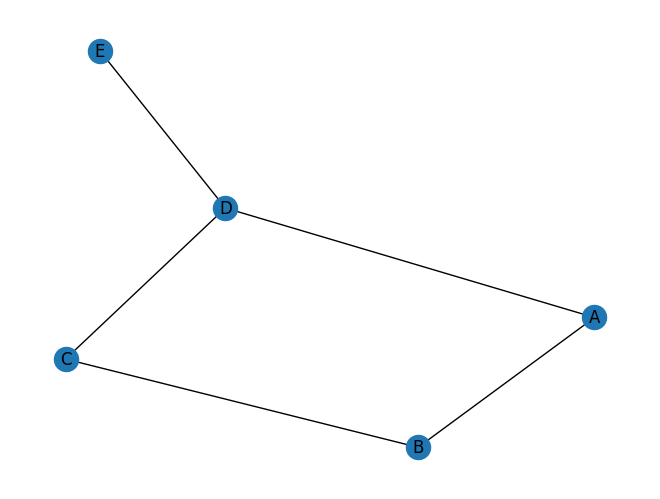

In [45]:
 # Dibujamos el grafo
nx.draw(G, with_labels=True)
plt.show()

In [52]:
walk = ['A', 'B', 'C', 'D', 'E']
path = ['A','B','C']

In [55]:
# Verificar si la caminata y la trayectoria son válidas
def is_valid_walk(G, walk):
    return all(G.has_edge(walk[n-1], walk[n]) for n in range(1, len(walk)))

def is_valid_path(G, path):
    return is_valid_walk(G, path) and len(set(path)) == len(path)

print('¿Es válida la caminata?', is_valid_walk(G, walk))
print('¿Es válida la trayectoria?', is_valid_path(G, path))
print('Ciclos: ', list(nx.simple_cycles(G)))


¿Es válida la caminata? True
¿Es válida la trayectoria? True
Ciclos:  [['A', 'B', 'C', 'D']]


In [57]:
# Verificar si la caminata y la trayectoria son válidas
def is_valid_walk(Gd, walk):
    return all(Gd.has_edge(walk[n-1], walk[n]) for n in range(1, len(walk)))

def is_valid_path(Gd, path):
    return is_valid_walk(Gd, path) and len(set(path)) == len(path)

print('¿Es válida la caminata?', is_valid_walk(Gd, walk))
print('¿Es válida la trayectoria?', is_valid_path(Gd, path))
print('Ciclos: ', list(nx.simple_cycles(Gd)))


¿Es válida la caminata? True
¿Es válida la trayectoria? True
Ciclos:  [['D', 'A', 'B', 'C']]


# Diametro

In [58]:
# Calcular el diámetro del grafo
diameter = nx.diameter(G)
print('El diámetro del grafo es:', diameter)


El diámetro del grafo es: 3


In [60]:
# Calcular la longitud media del camino
average_path_length = nx.average_shortest_path_length(G)
print('La longitud media del camino es:', average_path_length)

La longitud media del camino es: 1.6


In [63]:
print(nx.is_connected(G))  # Devuelve True


True


In [65]:
betweenness = nx.betweenness_centrality(G)

print(betweenness)

{'A': 0.16666666666666666, 'B': 0.08333333333333333, 'C': 0.16666666666666666, 'D': 0.5833333333333333, 'E': 0.0}


In [66]:
betweenness = nx.betweenness_centrality(Gd)

print(betweenness)

{'A': 0.25, 'B': 0.3333333333333333, 'C': 0.41666666666666663, 'D': 0.5, 'E': 0.0}


# Clustering

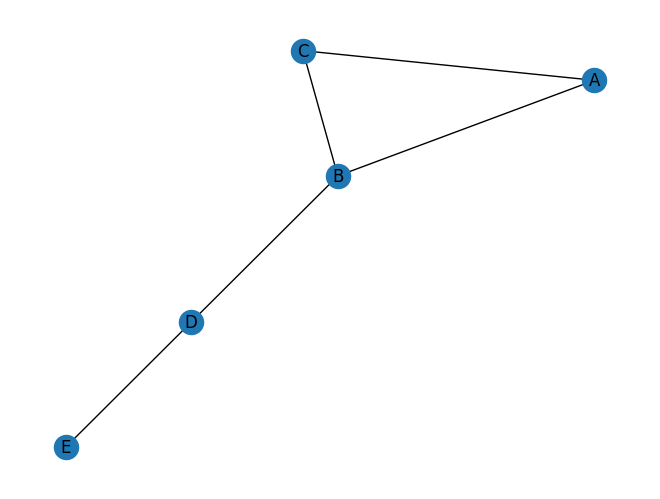

In [69]:
# Crear un grafo
Gc = nx.Graph()
Gc.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('D', 'E')])
 # Dibujamos el grafo
nx.draw(Gc, with_labels=True)
plt.show()

In [70]:
# Calcular coeficiente de clustering de cada nodo
clustering_coef = nx.clustering(Gc)

# Imprimir coeficientes de clustering
print(clustering_coef)

# Calcular y imprimir el coeficiente de clustering promedio de la red
average_clustering_coef = nx.average_clustering(Gc)
print("Average Clustering Coefficient:", average_clustering_coef)


{'A': 1.0, 'B': 0.3333333333333333, 'C': 1.0, 'D': 0, 'E': 0}
Average Clustering Coefficient: 0.4666666666666666


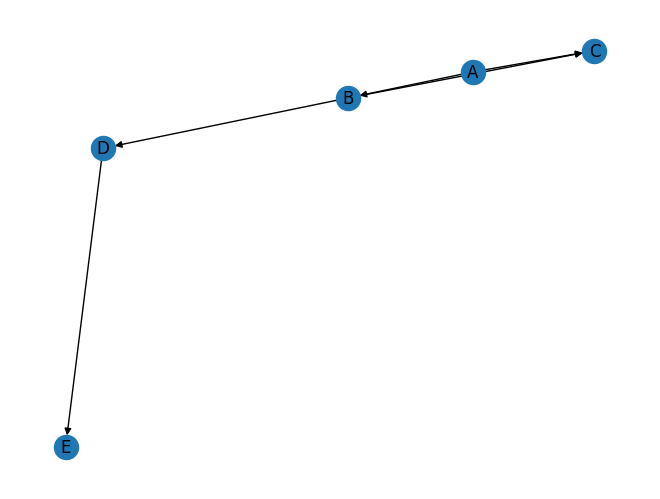

In [71]:
# Crear un grafo dirigido
Gc = nx.DiGraph()
Gc.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('D', 'E')])
 # Dibujamos el grafo
nx.draw(Gc, with_labels=True)
plt.show()

In [72]:


# Calcular coeficiente de clustering de cada nodo
clustering_coef = nx.clustering(Gd)

# Imprimir coeficientes de clustering
print(clustering_coef)

# Calcular y imprimir el coeficiente de clustering promedio de la red
average_clustering_coef = nx.average_clustering(Gd)
print("Average Clustering Coefficient:", average_clustering_coef)


{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}
Average Clustering Coefficient: 0.0


#BFS y DFS

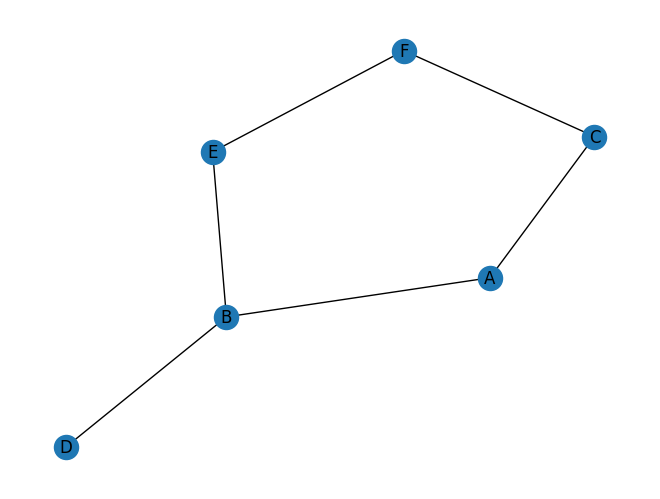

In [76]:
# Crear un grafo
GDB = nx.Graph()

# Agregar aristas
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('E', 'F')]
GDB.add_edges_from(edges)

 # Dibujamos el grafo
nx.draw(GDB, with_labels=True)
plt.show()


In [77]:
# BFS
print("Breadth-First Search:")
print(list(nx.bfs_tree(GDB, 'A')))



Breadth-First Search:
['A', 'B', 'C', 'D', 'E', 'F']


In [78]:
# DFS
print("\nDepth-First Search:")
print(list(nx.dfs_tree(GDB, 'A')))


Depth-First Search:
['A', 'B', 'D', 'E', 'F', 'C']


# Matrimonios florentinos

Un famoso conjunto de datos de redes sociales llamado "Florentine Families", que registra los matrimonios entre 16 familias nobles de Florencia durante el Renacimiento. 


En python crea la red del siguiente grafo.

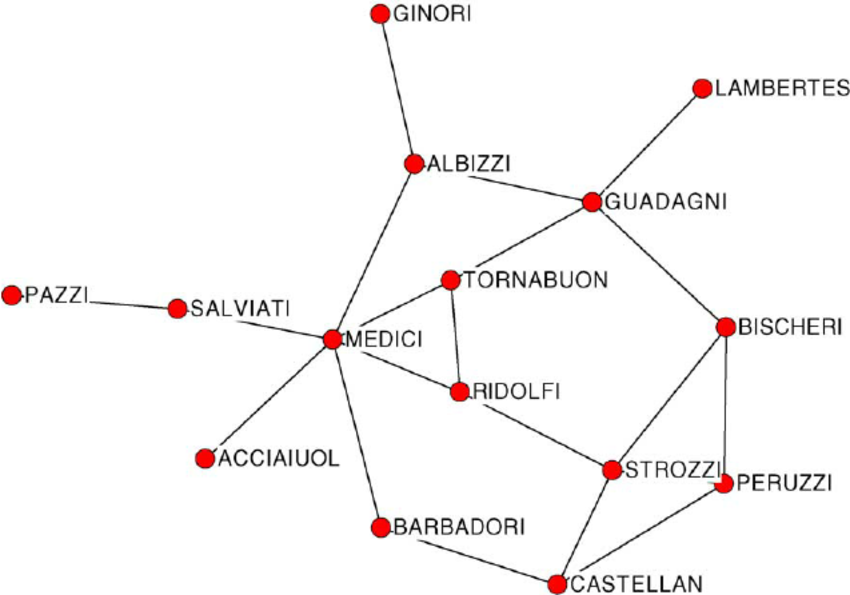

* Calcula la centralidad de grafo
* la distribucion de grados